# Simple MLP - Tensorflow:

input layer $ \rightarrow $ hidden layer 1 (activation function) $\rightarrow $ hidden layer 2 (activation function) $\rightarrow$ output layer (activation function). This is feed forward.

Compare output with actual output using a loss (cost) function.

Then optimsise this output by minimising loss function (altering weights and bias). This is backpropagation.

feed forward + backpropagation = epoch

In [100]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test_2, y_test_2 = x_test, y_test

x_train, x_test = x_train.reshape(60000, 784), x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255



'''one hot encode y:'''
num_of_classes = 10 #this is because there are 10 numbers in the set
y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)

training_data = (x_train, y_train)



neurons_L1 = 512
neurons_L2 = 512



In [33]:
#height x width:
#flattening x so height = none and width is equal to 28 times 28.
x = tf.placeholder('float',shape = (None, 784), name="x")
y = tf.placeholder('float', shape = (None), name = "y")

In [34]:
'''
def neural_network(data):
    hidden_L1 = {'weights': tf.Variable(tf.random_normal([784, neurons_L1])),
                'biases': tf.Variable(tf.random_normal([neurons_L1]))}
    
    hidden_L2 = {'weights': tf.Variable(tf.random_normal([neurons_L1, neurons_L2])),
                'biases': tf.Variable(tf.random_normal([neurons_L2]))}

    output_L = {'weights': tf.Variable(tf.random_normal([neurons_L2, num_of_classes])),
                'biases': tf.Variable(tf.random_normal([num_of_classes]))}
    
    L1 = tf.add(tf.matmul(data, hidden_L1['weights']), hidden_L1['biases']) #matrix multiplication
    L1 = tf.nn.relu(L1)
    
    L2 = tf.add(tf.matmul(L1, hidden_L2['weights']), hidden_L2['biases']) #matrix multiplication
    L2 = tf.nn.relu(L2)
    
    logits = tf.add(tf.matmul(L2, output_L['weights']), output_L['biases']) #matrix multiplication
    output = tf.nn.softmax(logits)
    
    return output, logits
'''

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)


In [90]:
hidden_L1 = {'weights': tf.Variable(tf.random_normal([784, neurons_L1])),
            'biases': tf.Variable(tf.random_normal([neurons_L1]))}
    
hidden_L2 = {'weights': tf.Variable(tf.random_normal([neurons_L1, neurons_L2])),
            'biases': tf.Variable(tf.random_normal([neurons_L2]))}

output_L = {'weights': tf.Variable(tf.random_normal([neurons_L2, num_of_classes])),
            'biases': tf.Variable(tf.random_normal([num_of_classes]))}

L1 = tf.add(tf.matmul(x, hidden_L1['weights']), hidden_L1['biases']) #matrix multiplication
L1 = tf.nn.relu(L1)

dropped = tf.nn.dropout(L1, rate = 1- 0.8)
    
L2 = tf.add(tf.matmul(dropped, hidden_L2['weights']), hidden_L2['biases']) #matrix multiplication
L2 = tf.nn.relu(L2)
    
dropped = tf.nn.dropout(L2, rate=1 - 0.8)

    
logits = tf.add(tf.matmul(dropped, output_L['weights']), output_L['biases']) #matrix multiplication
output = tf.nn.softmax(logits)

In [94]:
#output, logits = neural_network(x)
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) )
#optimiser = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(loss)
optimiser = tf.train.AdamOptimizer().minimize(loss)
#optimiser = tf.contrib.optimizer_v2.RMSPropOptimizer(learning_rate=0.001).minimize(loss)

init = tf.global_variables_initializer()
batch_size = 10

epochs = 20
total_batch_count = 60000//batch_size

In [95]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        
        avg_loss = 0 
        
        for i in range(total_batch_count):
            
            batch_x, batch_y = next_batch(batch_size, x_train, y_train)
            
            _, c = sess.run([optimiser, loss], feed_dict = {x:batch_x, y:batch_y})
            
            avg_loss +=c/total_batch_count
            
        print("epoch = ", epoch + 1, "loss =", avg_loss)
           
        
    preds = output.eval({x:x_test})
    
    sess.close()

epoch =  1 loss = 31.4545183569192
epoch =  2 loss = 2.1830140137175733
epoch =  3 loss = 1.776255582034588
epoch =  4 loss = 1.545479448974131
epoch =  5 loss = 1.3577506029059525
epoch =  6 loss = 1.234042049281302
epoch =  7 loss = 1.117136954570347
epoch =  8 loss = 0.980487498932827
epoch =  9 loss = 0.8431478800463186
epoch =  10 loss = 0.730327783201435
epoch =  11 loss = 0.626838134685642
epoch =  12 loss = 0.562698395236906
epoch =  13 loss = 0.5114965984220372
epoch =  14 loss = 0.4533883772986916
epoch =  15 loss = 0.3988233904115937
epoch =  16 loss = 0.36377668622683484
epoch =  17 loss = 0.3363790064422183
epoch =  18 loss = 0.3079250470487747
epoch =  19 loss = 0.2895993638057613
epoch =  20 loss = 0.2729035475788946


In [96]:
correct = 0
incorrect = []
for i in range(len(preds)):
    pred = np.argmax(preds[i])
    acts = np.argmax([y_test[i]])
    if pred == acts:
        correct+=1
    else:
        incorrect.append(i)
        
print("accuracy on test set: ", correct/len(preds))

accuracy on test set:  0.9209


In [97]:
len(incorrect)

791

actual = 5 pred = 8
actual = 9 pred = 3
actual = 3 pred = 2
actual = 2 pred = 8
actual = 9 pred = 4
actual = 7 pred = 2
actual = 4 pred = 9
actual = 2 pred = 8
actual = 9 pred = 4
actual = 2 pred = 3
actual = 9 pred = 8
actual = 5 pred = 8
actual = 3 pred = 8
actual = 3 pred = 8
actual = 9 pred = 8
actual = 4 pred = 6
actual = 6 pred = 0
actual = 2 pred = 8
actual = 7 pred = 2
actual = 8 pred = 3


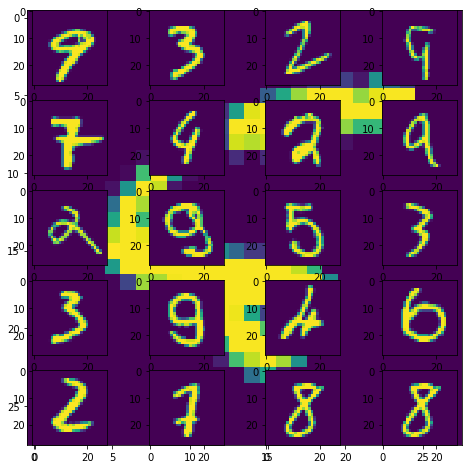

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

'''
plt.figure()
for j in range(10):
    i = incorrect[j]
    pred= np.argmax(preds[i])
    act = np.argmax([y_test[i]])
    plt.imshow(x_test_2[i])
    print("actual =", act, "pred =", pred)
    
plt.show()
'''

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for j in range(0, columns*rows):

    
    i = incorrect[j]
    pred= np.argmax(preds[i])
    act = np.argmax([y_test[i]])
    plt.imshow(x_test_2[i])
    print("actual =", act, "pred =", pred)
    
    fig.add_subplot(rows, columns, j+1)
    plt.imshow(x_test_2[i])
plt.show()


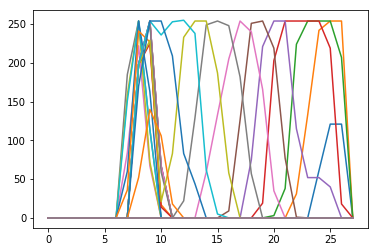

In [103]:


plt.plot(x_test_2[])

7

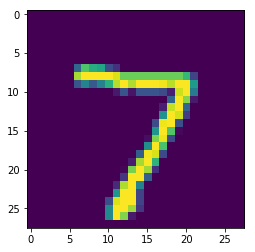